In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, date
import seaborn as sns

# Load Data
* Handle missing values, duplicated values, outlier

In [31]:
total = pd.read_csv("/Users/ibulmnie/Documents/GitHub/ML20222.PredictionBitcoin/data/saved_data.csv")
total['Date'] = pd.to_datetime(total['Date'])

df = total.set_index('Date')
df.head()

,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,Total_Fees(USD),...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-16,30310.3,30299.2,30545.3,30134.6,34.48,840992.0,4.788780e+13,1866594.290,495223185.0,484205.915377,...,2119.29,100.03,0.090465,0.52089,2015.6,25.438,9023.5,4137.64,33885.31,28493.47
2023-04-15,30299.6,30472.6,30586.5,30208.8,31.71,1045660.0,4.788780e+13,1839875.354,631025193.0,630623.285367,...,2090.59,96.66,0.088890,0.51930,2002.2,25.460,9023.5,4137.64,33885.31,28493.47
2023-04-14,30472.5,30387.4,30964.9,30026.0,98.38,1016042.0,4.788780e+13,1759535.436,559166432.0,858535.297189,...,2099.98,96.34,0.088707,0.52269,2002.2,25.460,9023.5,4137.64,33885.31,28493.47
2023-04-13,30387.4,29892.4,30524.1,29864.5,65.87,1009669.0,4.788780e+13,1812112.549,567094231.0,767012.808110,...,2012.11,94.19,0.087344,0.51244,2041.3,25.925,9058.5,4146.22,34030.34,28156.97
2023-04-12,29886.4,30209.8,30473.0,29679.5,78.69,1056542.0,4.788780e+13,1933495.919,635037442.0,757368.783682,...,1916.58,92.02,0.083398,0.50473,2010.9,25.458,8916.5,4091.95,33647.22,28082.70


In [32]:
df.shape

(4654, 23)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4654 entries, 2023-04-16 to 2010-07-20
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BTC_close                   4654 non-null   float64
 1   BTC_open                    4654 non-null   float64
 2   BTC_high                    4654 non-null   float64
 3   BTC_low                     4654 non-null   float64
 4   BTC_volume                  4654 non-null   float64
 5   Active_Addr_Cnt             4654 non-null   float64
 6   Difficulty                  4654 non-null   float64
 7   Mean_Block_Size(in_bytes)   4654 non-null   float64
 8   Sum_Block_Weight            4654 non-null   float64
 9   Total_Fees(USD)             4654 non-null   float64
 10  Mean_Hashrate               4654 non-null   float64
 11  Xfer_Cnt                    4654 non-null   float64
 12  Mean_Tx_size(native_units)  4654 non-null   float64
 13  ETH            

In [34]:
df.describe()

,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,Total_Fees(USD),...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
count,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4.654000e+03,4.654000e+03,4.654000e+03,4.654000e+03,4.654000e+03,...,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000
mean,8950.828126,8944.396197,9182.648904,8680.543532,144.272183,4.974545e+05,7.399910e+12,6.883463e+05,3.329426e+08,5.498044e+05,...,505.010290,45.052975,0.026408,0.229873,1474.337129,21.657901,7112.199345,2492.349280,21487.496401,18751.425404
std,14517.759120,14515.100053,14900.138248,14078.916437,199.685947,3.731797e+05,1.103629e+13,4.990862e+05,2.151278e+08,1.528054e+06,...,945.449318,63.364718,0.069391,0.334681,253.778406,6.479395,1491.343889,989.044608,7511.506584,6322.971966
min,0.100000,0.100000,0.100000,0.000000,0.170000,4.080000e+02,1.820000e+02,4.164167e+02,2.841400e+05,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1049.600000,11.772000,0.000000,1047.220000,9985.810000,8160.010000
25%,140.475000,140.400000,145.800000,135.825000,25.407500,8.702175e+04,1.322172e+08,1.656955e+05,1.124594e+08,3.741492e+03,...,0.000000,0.000000,0.000000,0.000000,1260.025000,16.624500,5947.125000,1697.435000,15464.300000,14313.030000
50%,916.050000,915.050000,934.150000,877.350000,63.605000,5.389900e+05,2.840750e+11,7.887917e+05,4.066180e+08,6.090908e+04,...,12.430000,3.870000,0.000000,0.008870,1371.850000,19.570000,6962.000000,2204.720000,19161.280000,19435.830000
75%,9932.450000,9926.450000,10231.950000,9636.050000,158.375000,8.174050e+05,1.389755e+13,1.087807e+06,5.072356e+08,4.321621e+05,...,396.107500,67.199500,0.003335,0.350712,1721.025000,25.340750,8151.437500,3046.155000,26828.202500,22902.512500
max,67527.900000,67528.700000,68990.600000,66334.900000,999.530000,1.366494e+06,4.788780e+13,2.535436e+06,7.584308e+08,2.139776e+07,...,4808.380000,386.820000,0.686880,2.780000,2069.400000,48.599000,10674.000000,4796.560000,36799.650000,30670.100000


<Axes: >

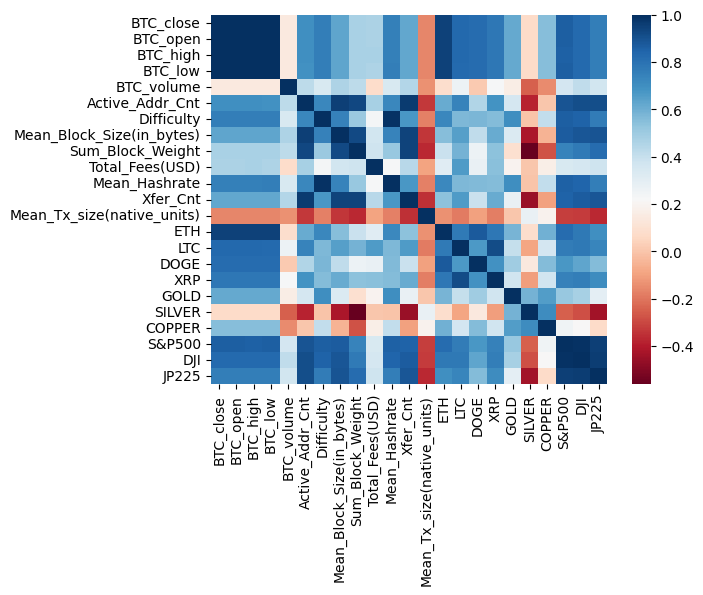

In [35]:
sns.heatmap(df.corr(), cmap="RdBu")

# Slpit Data (Testing, Training Data Sets)

In [36]:
from datetime import datetime

for index in total.index:
    total.loc[index, "Date"] = datetime.strptime(str(total.loc[index, "Date"])[:10], '%Y-%m-%d').date()

Start_day = date(2015, 12, 30)
Test_day = date(2018,4,1)
#chon ra 20-25% data trong giai doan 1
End_day = date(2018,9,30)
# train, test
total = total[(total["Date"] >= Start_day) & (total["Date"] <= End_day)].reset_index(drop = True)
train_dataset = total[total["Date"] < Test_day].reset_index(drop = True)
test_dataset = total[total["Date"] >= Test_day].reset_index(drop = True)


In [98]:
X_train = train_dataset.drop(["Date"], axis=1)[:-1]
y_train = train_dataset["BTC_close"][1:].reset_index(drop=True)

X_test = test_dataset.drop(["Date"], axis=1)[:-1]
y_test = test_dataset["BTC_close"][1:].reset_index(drop=True)

In [99]:
print("Kích thước X_train:", X_train.shape)
print("Kích thước y_train:", y_train.shape)
print("Kích thước X_test:", X_test.shape)
print("Kích thước y_test:", y_test.shape)

Kích thước X_train: (822, 23)
Kích thước y_train: (822,)
Kích thước X_test: (182, 23)
Kích thước y_test: (182,)


# Load Model

In [40]:
#import sklearn modules
import time
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [41]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the range of values for n_estimators
n_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=100)]
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
max_features = ['sqrt', 'log2', None]
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000], 'max_features': ['sqrt', 'log2', None], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30], 'bootstrap': [True, False]}


# Training and Evaluating

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [43]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 500, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [44]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, 22, 24, 26,
                                                      28, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                                                         280, 290, 300, ...]},
                   random_state=42, verbose=2)

In [45]:
print ('Best Parameters: ', rf_random.best_params_)

Best Parameters:  {'n_estimators': 150, 'max_features': None, 'max_depth': 10, 'bootstrap': True}


## Using the best parameters


In [46]:
start_time = time.time()

randmf = RandomForestRegressor(**rf_random.best_params_) 
randmf.fit( X_train, y_train) 

end_time = time.time()
all_run_time = end_time - start_time

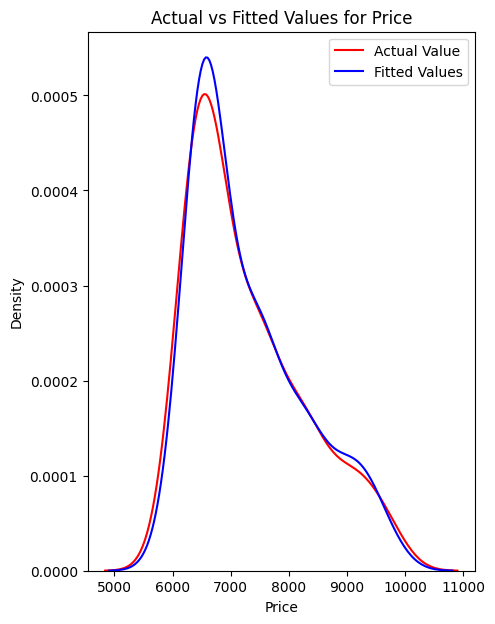

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = randmf.predict(X_test)

plt.figure(figsize=(5, 7))

sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()


In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
y_train_pred = randmf.predict(X_train)

y_test = np.array(y_test)

def AUC(y_test, y_pred):
    count = 0
    for i in range(1,len(y_test)):
        if (y_test[i] - y_test[i-1]) * (y_pred[i] - y_pred[i-1]) > 0:
            count += 1
    return count/(len(y_test)-1)
print("Test accuracy for train set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_train, y_train_pred)))

#MAPE
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_train,y_train_pred))
print()

print("Test accuracy for test set")
#RMSE
rmse_all = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE):", rmse_all)

#MAPE
mape_all = mean_absolute_percentage_error(y_test, y_pred)
print(" Mean Absolute Percentage Error (MAPE):", mape_all)
print()
AUC_all = AUC(y_test, y_pred)
#AUC
print("AUC test:", AUC_all)

Test accuracy for train set
Root Mean Square Error (RMSE): 33.92979903732966
Mean Absolute Percentage Error (MAPE): 0.002303019735124078

Test accuracy for test set
Root Mean Square Error (RMSE): 71.41784912503832
 Mean Absolute Percentage Error (MAPE): 0.007519333890575278

AUC test: 0.9060773480662984


## Feature Reduction

In [49]:
features = X_train.columns
# Get numerical feature importances
importances = list(randmf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: BTC_open             Importance: 0.69
Variable: BTC_high             Importance: 0.16
Variable: BTC_low              Importance: 0.1
Variable: BTC_close            Importance: 0.04
Variable: BTC_volume           Importance: 0.0
Variable: Active_Addr_Cnt      Importance: 0.0
Variable: Difficulty           Importance: 0.0
Variable: Mean_Block_Size(in_bytes) Importance: 0.0
Variable: Sum_Block_Weight     Importance: 0.0
Variable: Total_Fees(USD)      Importance: 0.0
Variable: Mean_Hashrate        Importance: 0.0
Variable: Xfer_Cnt             Importance: 0.0
Variable: Mean_Tx_size(native_units) Importance: 0.0
Variable: ETH                  Importance: 0.0
Variable: LTC                  Importance: 0.0
Variable: DOGE                 Importance: 0.0
Variable: XRP                  Importance: 0.0
Variable: GOLD                 Importance: 0.0
Variable: SILVER               Importance: 0.0
Variable: COPPER               Importance: 0.0
Variable: S&P500               Importance: 0.0

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

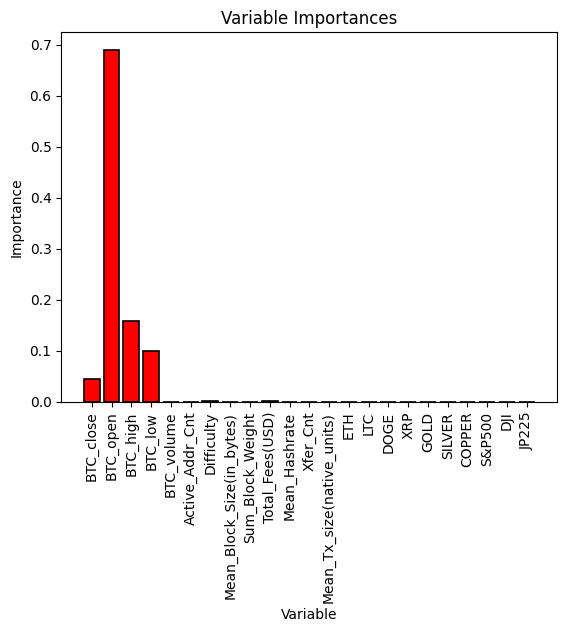

In [50]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

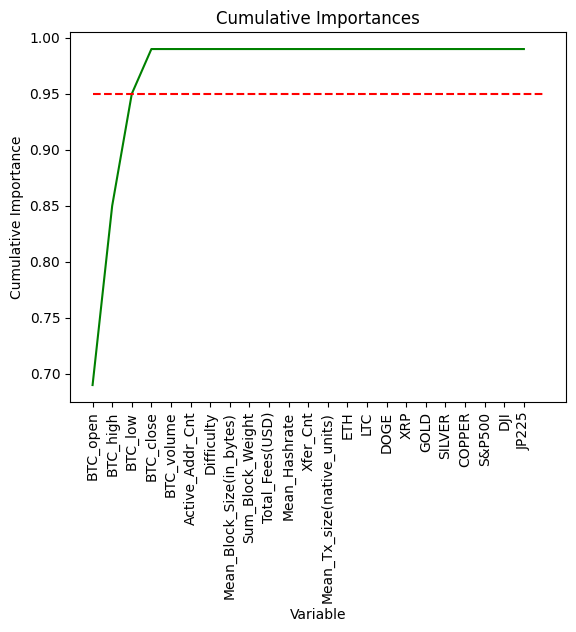

In [51]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [52]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
num = np.where(cumulative_importances > 0.95)[0][0] + 1
print('Number of features for 95% importance:', num)

Number of features for 95% importance: 4


In [53]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:num]]
print(important_feature_names)

['BTC_open', 'BTC_high', 'BTC_low', 'BTC_close']


In [54]:
train_data = X_train[important_feature_names]
test_data = X_test[important_feature_names]
# Sanity check on operations
print('Important train features shape:', train_data.shape)
print('Important test features shape:', test_data.shape)


Important train features shape: (822, 4)
Important test features shape: (182, 4)


#### Training and Evaluating on Important Features


In [55]:
start_time = time.time()

# Train the expanded model on only the important features
randmf.fit(train_data, y_train);

# Make predictions on test data
predictions = randmf.predict(test_data)

end_time = time.time()
reduce_run_time = end_time - start_time

#RMSE
from sklearn.metrics import mean_squared_error
rmse_reduce = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse_reduce)
print()

#MAPE
mape_reduce = np.average(np.abs((y_test - predictions) / y_test))
print("MAPE:", mape_reduce)
print()

AUC_reduce = AUC(np.array(y_test), predictions)
print("AUC test:", AUC_reduce )

RMSE: 61.521375454523266

MAPE: 0.006669534870709704

AUC test: 0.9116022099447514


#### Normalization with original data

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize the features using MinMaxScaler for the training dataset
scaler = MinMaxScaler()
X_train_normalized_all = scaler.fit_transform(X_train)

# Normalize the features using the same scaler for the testing dataset
X_test_normalized_all = scaler.transform(X_test)

In [103]:
rf_regressor = RandomForestRegressor(**rf_random.best_params_)

start_time = time.time()
rf_regressor.fit(X_train_normalized_all, y_train)

y_pred_norma_all = rf_regressor.predict(X_test_normalized_all)

end_time = time.time()
normal_all_run_time = end_time - start_time

from sklearn.metrics import mean_squared_error

#RMSE
from sklearn.metrics import mean_squared_error
rmse_normal_all = np.sqrt(mean_squared_error(y_test, y_pred_norma_all))
print("RMSE:", rmse_normal_all)
print()

#MAPE
mape_normal_all = np.average(np.abs((y_test - y_pred_norma_all) / y_test))
print("MAPE:", mape_normal_all)
print()

AUC_normal_all = AUC(np.array(y_test), y_pred_norma_all)
print("AUC test:", AUC_normal_all )

RMSE: 76.35292961196268

MAPE: 0.008446664636756264

AUC test: 0.9226519337016574


#### Normalization with Importance Features

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize the features using MinMaxScaler for the training dataset
scaler = MinMaxScaler()
X_train_normalized_reduce = scaler.fit_transform(train_data)

# Normalize the features using the same scaler for the testing dataset
X_test_normalized_reduce = scaler.transform(test_data)

In [105]:
rf_regressor = RandomForestRegressor(**rf_random.best_params_)

start_time = time.time()
rf_regressor.fit(X_train_normalized_reduce, y_train)

y_pred_norma_reduce = rf_regressor.predict(X_test_normalized_reduce)

end_time = time.time()
normal_reduce_run_time = end_time - start_time

from sklearn.metrics import mean_squared_error

#RMSE
from sklearn.metrics import mean_squared_error
rmse_normal_reduce = np.sqrt(mean_squared_error(y_test, y_pred_norma_reduce))
print("RMSE:", rmse_normal_reduce)
print()

#MAPE
mape_normal_reduce = np.average(np.abs((y_test - y_pred_norma_reduce) / y_test))
print("MAPE:", mape_normal_reduce)
print()

AUC_normal_reduce = AUC(np.array(y_test), y_pred_norma_reduce)
print("AUC test:", AUC_normal_reduce)

RMSE: 61.39691612344682

MAPE: 0.006750860742569202

AUC test: 0.9171270718232044


## Summary statistical table

In [107]:
def print_results(AUC_all, rmse_all, mape_all, all_run_time, AUC_reduce, rmse_reduce, mape_reduce, reduce_run_time, 
                  AUC_normal_all, rmse_normal_all, mape_normal_all, normal_all_run_time,
                 AUC_normal_reduce, rmse_normal_reduce, mape_normal_reduce, normal_reduce_run_time):
    headers = ['Type', 'Number of Features','Accuracy', 'RMSE', 'MAPE', 'Run Time (s)']
    all_results = [['All', len(importances), AUC_all, rmse_all, mape_all, all_run_time],
                   ['Reduce', len(important_feature_names), AUC_reduce, rmse_reduce, mape_reduce, reduce_run_time],
                   ['Normalization - All', len(importances), AUC_normal_all, rmse_normal_all, mape_normal_all, normal_all_run_time],
                  ['Normalization - Reduce', len(important_feature_names), AUC_normal_reduce, rmse_normal_reduce, mape_normal_reduce, normal_reduce_run_time]]

    # Calculate the maximum width for each column
    col_widths = [max(len(str(row[i])) for row in all_results + [headers]) for i in range(len(headers))]

    # Print table headers
    header_format = '  '.join(f"{{:<{width}}}" for width in col_widths)
    print(header_format.format(*headers))

    # Print separator row
    separator = '-' * (sum(col_widths) + 3 * (len(col_widths) - 1))
    print(separator)

    # Print table rows
    row_format = '  '.join(f"{{:<{width}}}" for width in col_widths)
    for result in all_results:
        index, num_features, AUC, rmse, mape, run_time = result
        print(row_format.format(index, num_features, AUC, rmse, mape, run_time))
        
print_results(AUC_all, rmse_all, mape_all, all_run_time, AUC_reduce, rmse_reduce, mape_reduce, reduce_run_time,
             AUC_normal_all, rmse_normal_all, mape_normal_all, normal_all_run_time,
             AUC_normal_reduce, rmse_normal_reduce, mape_normal_reduce, normal_reduce_run_time)


Type           Number of Features  Accuracy            RMSE                MAPE                  Run Time (s)     
-----------------------------------------------------------------------------------------------------------------------
All            23                  0.9060773480662984  71.41784912503832   0.007519333890575278  5.936707258224487
Reduce         4                   0.9116022099447514  61.521375454523266  0.006669534870709704  2.091670036315918
Normalization  23                  0.9226519337016574  76.35292961196268   0.008446664636756264  7.478268146514893
Normalization  4                   0.9171270718232044  61.39691612344682   0.006750860742569202  2.353295087814331


# Graph Predicted Values with Test Set

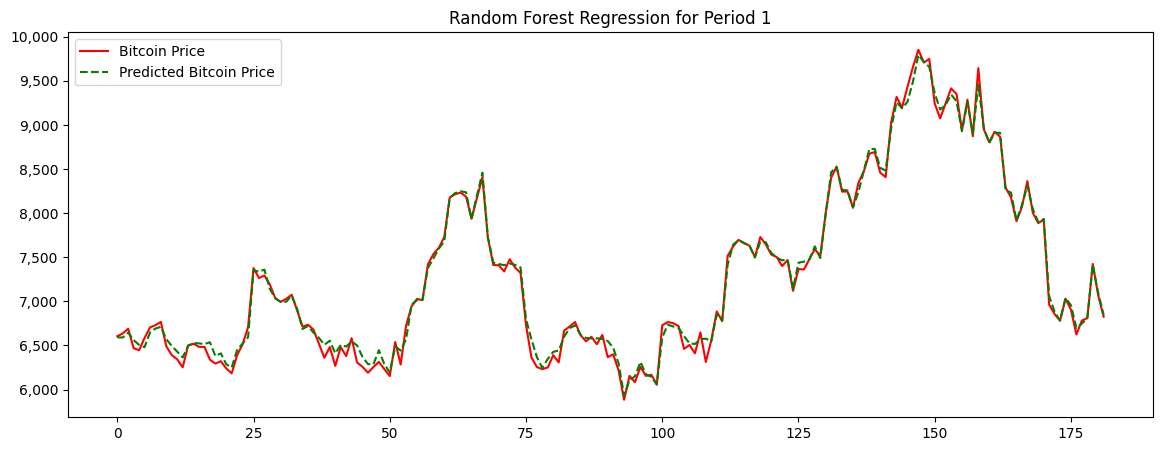

In [57]:

#hien thi ket qua du doan
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
ax.plot(y_test, color = 'red', label="Bitcoin Price")
ax.plot(y_pred, color = 'green', label="Predicted Bitcoin Price", linestyle="dashed")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # .3f
plt.title("Random Forest Regression for Period 1")
plt.legend()
plt.show()

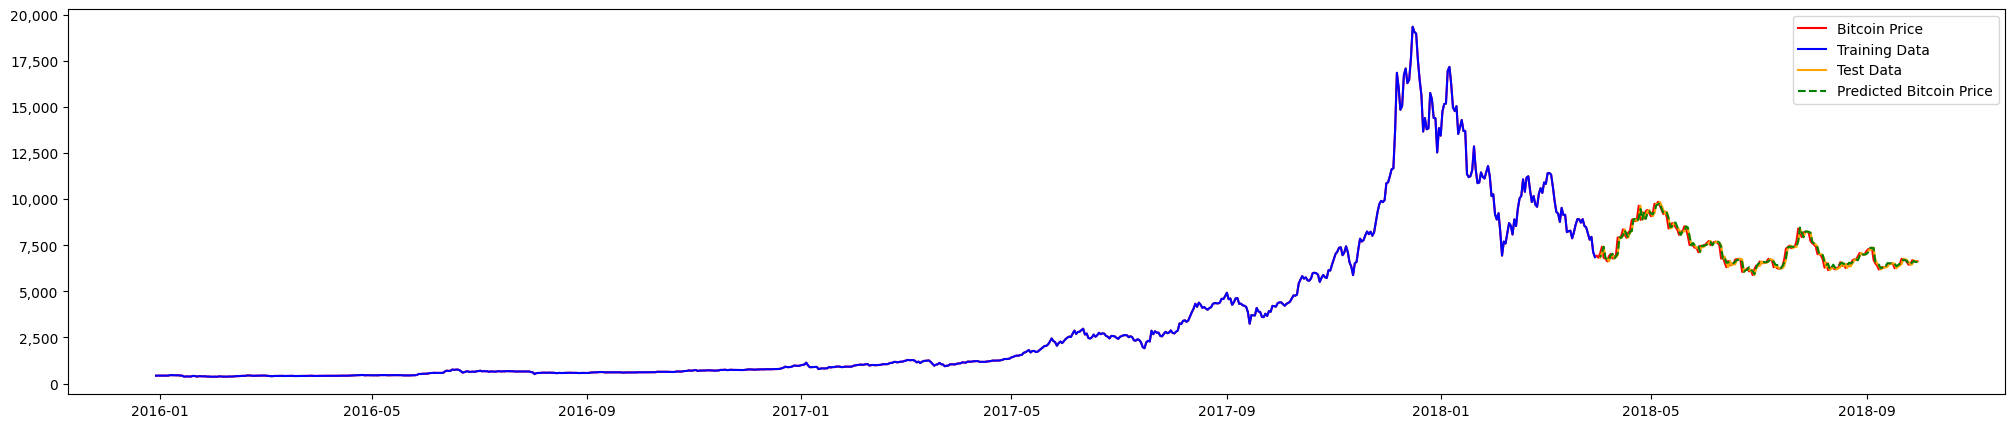

[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=630; total time=  29.5s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=830; total time=  23.6s
[CV] END bootstrap=False, max_depth=10, max_features=None, n_estimators=370; total time=  22.9s
[CV] END bootstrap=True, max_depth=26, max_features=log2, n_estimators=70; total time=   1.3s
[CV] END bootstrap=True, max_depth=28, max_features=log2, n_estimators=720; total time=  13.5s
[CV] END bootstrap=True, max_depth=26, max_features=log2, n_estimators=540; total time=  10.5s
[CV] END bootstrap=True, max_depth=26, max_features=sqrt, n_estimators=540; total time=  11.0s
[CV] END bootstrap=False, max_depth=16, max_features=None, n_estimators=220; total time=  16.2s
[CV] END bootstrap=True, max_depth=24, max_features=log2, n_estimators=650; total time=  13.1s
[CV] END bootstrap=False, max_depth=26, max_features=None, n_estimators=50; total time=   3.7s
[CV] END bootstrap=False, max_depth=14, max_feature

[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=630; total time=  30.0s
[CV] END bootstrap=True, max_depth=28, max_features=log2, n_estimators=820; total time=  15.9s
[CV] END bootstrap=False, max_depth=28, max_features=sqrt, n_estimators=130; total time=   2.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, n_estimators=310; total time=   6.7s
[CV] END bootstrap=False, max_depth=10, max_features=None, n_estimators=370; total time=  23.1s
[CV] END bootstrap=True, max_depth=28, max_features=log2, n_estimators=720; total time=  13.6s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=880; total time=  15.3s
[CV] END bootstrap=True, max_depth=26, max_features=sqrt, n_estimators=540; total time=  10.9s
[CV] END bootstrap=False, max_depth=22, max_features=log2, n_estimators=380; total time=   8.7s
[CV] END bootstrap=True, max_depth=24, max_features=log2, n_estimators=650; total time=  13.4s
[CV] END bootstrap=False, max_depth=26, max_fea

[CV] END bootstrap=False, max_depth=24, max_features=log2, n_estimators=410; total time=  10.2s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=830; total time=  25.1s
[CV] END bootstrap=True, max_depth=28, max_features=log2, n_estimators=820; total time=  15.9s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, n_estimators=310; total time=   6.8s
[CV] END bootstrap=False, max_depth=26, max_features=log2, n_estimators=840; total time=  17.7s
[CV] END bootstrap=False, max_depth=26, max_features=log2, n_estimators=840; total time=  17.9s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=880; total time=  15.4s
[CV] END bootstrap=False, max_depth=16, max_features=None, n_estimators=220; total time=  16.4s
[CV] END bootstrap=False, max_depth=22, max_features=log2, n_estimators=380; total time=   8.9s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=680; total time=   6.8s
[CV] END bootstrap=False, max_depth=26, max_f

[CV] END bootstrap=False, max_depth=24, max_features=log2, n_estimators=410; total time=  10.2s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=630; total time=  29.1s
[CV] END bootstrap=False, max_depth=28, max_features=sqrt, n_estimators=130; total time=   2.8s
[CV] END bootstrap=False, max_depth=28, max_features=sqrt, n_estimators=130; total time=   2.9s
[CV] END bootstrap=False, max_depth=28, max_features=sqrt, n_estimators=130; total time=   2.9s
[CV] END bootstrap=False, max_depth=28, max_features=sqrt, n_estimators=130; total time=   2.9s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, n_estimators=310; total time=   6.8s
[CV] END bootstrap=False, max_depth=10, max_features=None, n_estimators=370; total time=  23.3s
[CV] END bootstrap=True, max_depth=26, max_features=log2, n_estimators=540; total time=  10.1s
[CV] END bootstrap=True, max_depth=26, max_features=log2, n_estimators=540; total time=  10.4s
[CV] END bootstrap=False, max_depth=8, max_f

[CV] END bootstrap=False, max_depth=24, max_features=log2, n_estimators=410; total time=  10.2s
[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=630; total time=  28.8s
[CV] END bootstrap=True, max_depth=28, max_features=log2, n_estimators=820; total time=  15.7s
[CV] END bootstrap=False, max_depth=10, max_features=None, n_estimators=370; total time=  23.2s
[CV] END bootstrap=True, max_depth=26, max_features=log2, n_estimators=70; total time=   1.3s
[CV] END bootstrap=True, max_depth=28, max_features=log2, n_estimators=720; total time=  13.5s
[CV] END bootstrap=True, max_depth=26, max_features=log2, n_estimators=540; total time=  10.5s
[CV] END bootstrap=True, max_depth=26, max_features=sqrt, n_estimators=540; total time=  11.0s
[CV] END bootstrap=False, max_depth=16, max_features=None, n_estimators=220; total time=  16.0s
[CV] END bootstrap=True, max_depth=24, max_features=log2, n_estimators=650; total time=  13.1s
[CV] END bootstrap=False, max_depth=30, max_featu

[CV] END bootstrap=False, max_depth=24, max_features=log2, n_estimators=410; total time=  10.2s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=830; total time=  25.1s
[CV] END bootstrap=True, max_depth=28, max_features=log2, n_estimators=820; total time=  15.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, n_estimators=310; total time=   6.9s
[CV] END bootstrap=False, max_depth=26, max_features=log2, n_estimators=840; total time=  17.6s
[CV] END bootstrap=False, max_depth=26, max_features=log2, n_estimators=840; total time=  17.8s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=880; total time=  15.6s
[CV] END bootstrap=False, max_depth=16, max_features=None, n_estimators=220; total time=  15.4s
[CV] END bootstrap=False, max_depth=22, max_features=log2, n_estimators=380; total time=   8.8s
[CV] END bootstrap=False, max_depth=2, max_features=log2, n_estimators=680; total time=   7.0s
[CV] END bootstrap=False, max_depth=26, max_f

[CV] END bootstrap=False, max_depth=24, max_features=log2, n_estimators=410; total time=  10.3s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=830; total time=  25.3s
[CV] END bootstrap=True, max_depth=28, max_features=log2, n_estimators=820; total time=  15.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, n_estimators=310; total time=   6.8s
[CV] END bootstrap=False, max_depth=26, max_features=log2, n_estimators=840; total time=  17.9s
[CV] END bootstrap=True, max_depth=26, max_features=log2, n_estimators=70; total time=   1.3s
[CV] END bootstrap=True, max_depth=26, max_features=log2, n_estimators=70; total time=   1.3s
[CV] END bootstrap=True, max_depth=28, max_features=log2, n_estimators=720; total time=  13.4s
[CV] END bootstrap=True, max_depth=26, max_features=log2, n_estimators=540; total time=  10.5s
[CV] END bootstrap=True, max_depth=26, max_features=sqrt, n_estimators=540; total time=  11.1s
[CV] END bootstrap=False, max_depth=16, max_featur

[CV] END bootstrap=True, max_depth=8, max_features=None, n_estimators=630; total time=  29.9s
[CV] END bootstrap=True, max_depth=4, max_features=None, n_estimators=830; total time=  23.8s
[CV] END bootstrap=False, max_depth=10, max_features=None, n_estimators=370; total time=  23.4s
[CV] END bootstrap=True, max_depth=26, max_features=log2, n_estimators=70; total time=   1.3s
[CV] END bootstrap=True, max_depth=28, max_features=log2, n_estimators=720; total time=  13.7s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, n_estimators=880; total time=  15.4s
[CV] END bootstrap=True, max_depth=26, max_features=sqrt, n_estimators=540; total time=  10.8s
[CV] END bootstrap=False, max_depth=22, max_features=log2, n_estimators=380; total time=   8.7s
[CV] END bootstrap=True, max_depth=24, max_features=log2, n_estimators=650; total time=  13.2s
[CV] END bootstrap=False, max_depth=26, max_features=None, n_estimators=50; total time=   3.8s
[CV] END bootstrap=False, max_depth=30, max_feature

In [58]:
fig, ax = plt.subplots(figsize=(25, 5))

ax.plot(total['Date'], total['BTC_close'], color='red', label="Bitcoin Price")
ax.plot(total['Date'][-len(y_train):], y_train, color='blue', label="Training Data")
ax.plot(total['Date'][:len(y_test)], y_test, color='orange', label="Test Data")
ax.plot(total['Date'][:len(y_pred)], y_pred, color='green', label="Predicted Bitcoin Price", linestyle="dashed")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # Định dạng đường trục y
plt.legend()
plt.show()
